In [2]:
import pandas as pd
import numpy as np

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id_number', 'diagnosis', 'radius_mean', 
              'texture_mean', 'perimeter_mean', 'area_mean', 
              'smoothness_mean', 'compactness_mean', 
              'concavity_mean','concave_points_mean', 
              'symmetry_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 
              'area_se', 'smoothness_se', 'compactness_se', 
              'concavity_se', 'concave_points_se', 
              'symmetry_se', 'fractal_dimension_se', 
              'radius_worst', 'texture_worst', 
              'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 
              'concavity_worst', 'concave_points_worst', 
              'symmetry_worst', 'fractal_dimension_worst'] 
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 30)

In [6]:
feature_selection = ['radius_se','compactness_se','fractal_dimension_mean','texture_worst','concavity_worst']

corr=df.loc[:,feature_selection].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,radius_se,compactness_se,fractal_dimension_mean,texture_worst,concavity_worst
radius_se,1,0.36,0.00011,0.19,0.38
compactness_se,0.36,1,0.56,0.14,0.64
fractal_dimension_mean,0.00011,0.56,1,-0.051,0.35
texture_worst,0.19,0.14,-0.051,1,0.37
concavity_worst,0.38,0.64,0.35,0.37,1


In [7]:
#속성 변수 선택
X=df.loc[:,feature_selection]
y=df['diagnosis']

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (398, 5)
test data 개수:  (171, 5)




In [8]:
# model.fit
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)

print('train_score: ', model_logit.score(X_train, y_train))
print('Test_score: ', model_logit.score(X_test, y_test))

train_score:  0.9447236180904522
Test_score:  0.9239766081871345


In [9]:
y_hat = model_logit.predict(X_test) # get test set precitions


# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

# 모형 성능 평가 - 평가지표 계산
logit_report = mt.classification_report(y_test, y_hat)            
print(logit_report)

accuracy 0.9239766081871345
confusion matrix
 [[104   8]
 [  5  54]]
              precision    recall  f1-score   support

           B       0.95      0.93      0.94       112
           M       0.87      0.92      0.89        59

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



In [10]:
# iterate over the coefficients
weights = model_logit.coef_.T # take transpose to make a column vector
variable_names = df[feature_selection].columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

radius_se has weight of 3.032748700406972
compactness_se has weight of -1.015993769718795
fractal_dimension_mean has weight of -0.7886048495864941
texture_worst has weight of 1.1214801923225994
concavity_worst has weight of 3.2880545937045587


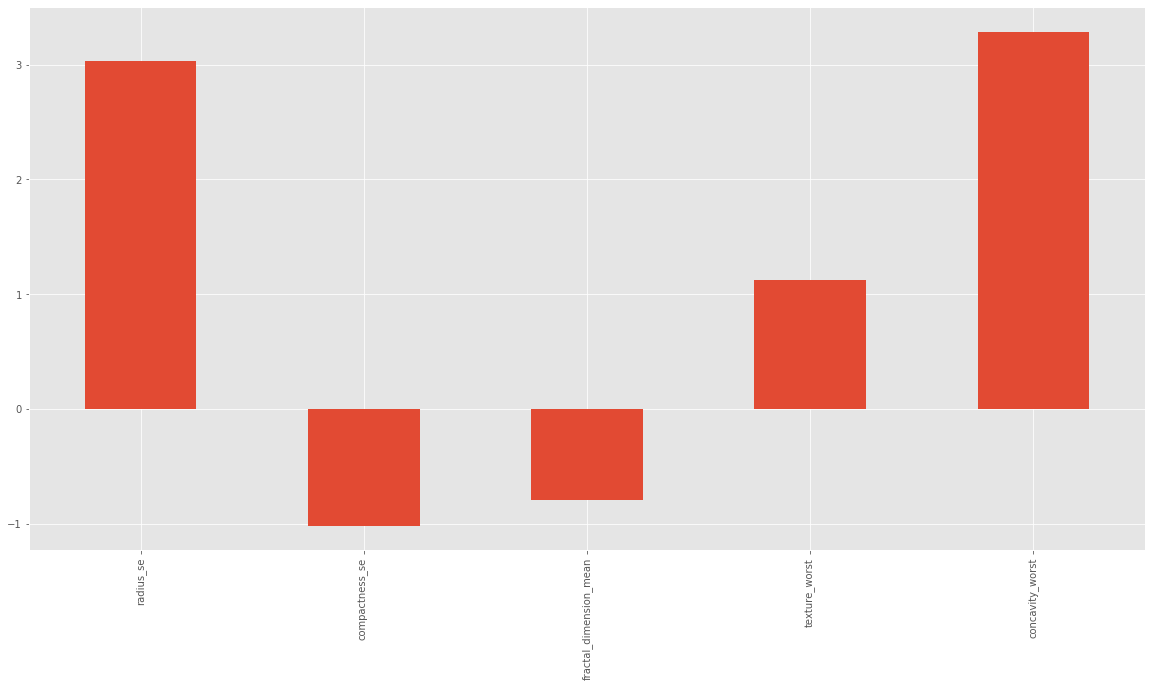

In [12]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize = (20,10))
weights = pd.Series(model_logit.coef_[0],index=df[feature_selection].columns)
weights.plot(kind='bar')
plt.show()